In [166]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc("font",size=14)

In [167]:
import warnings 
warnings.filterwarnings('ignore')

In [168]:
train_df=pd.read_csv('titanic_train.csv')
test_df=pd.read_csv('titanic_test.csv')

In [169]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [170]:
train_df.shape

(891, 12)

In [171]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

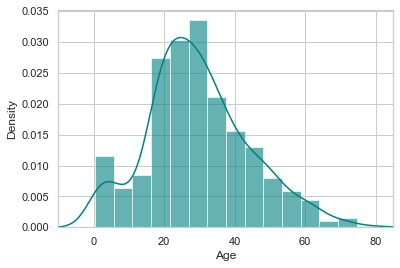

In [172]:
# histogram for age to check the distribution
# using matplot
ax=train_df["Age"].hist(bins=15,density=True,stacked =True,color='teal',alpha=0.6)
train_df["Age"].plot(kind='density',color='teal')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Density'>

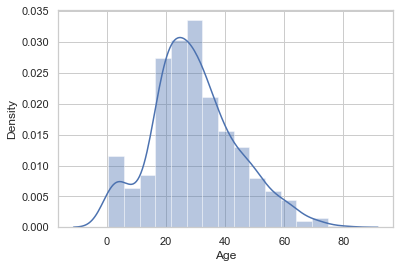

In [173]:
# using seaborn
sns.set(style="white") # white background
sns.set(style="whitegrid",color_codes=True)
sns.distplot(train_df['Age'],bins=15)

In [174]:
train_data=train_df.copy()

In [175]:
train_data["Age"].fillna(train_df["Age"].median(skipna=True),inplace=True)
train_data["Embarked"].fillna(train_df["Embarked"].value_counts().idxmax(),inplace=True)
train_data.drop('Cabin',axis=1,inplace=True)

In [176]:
train_data["TravelAlone"]=np.where((train_data["SibSp"]+train_data["Parch"])>0,0,1)
train_data.drop('SibSp',axis=1,inplace=True)
train_data.drop('Parch',axis=1,inplace=True)

In [177]:
training=pd.get_dummies(train_data,columns=['Pclass','Embarked','Sex'])
training.drop('Sex_female',axis=1,inplace=True)
training.drop('PassengerId',axis=1,inplace=True)
training.drop('Name',axis=1,inplace=True)
training.drop('Ticket',axis=1,inplace=True)
final_train=training
final_train.head()

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,0,22.0,7.2500,0,0,0,1,0,0,1,1
1,1,38.0,71.2833,0,1,0,0,1,0,0,0
2,1,26.0,7.9250,1,0,0,1,0,0,1,0
3,1,35.0,53.1000,0,1,0,0,0,0,1,0
4,0,35.0,8.0500,1,0,0,1,0,0,1,1


In [178]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
Ticket         0
Fare           0
Embarked       0
TravelAlone    0
dtype: int64

In [179]:
final_train.isnull().sum()

Survived       0
Age            0
Fare           0
TravelAlone    0
Pclass_1       0
Pclass_2       0
Pclass_3       0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
Sex_male       0
dtype: int64

In [180]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<AxesSubplot:xlabel='Age', ylabel='Density'>

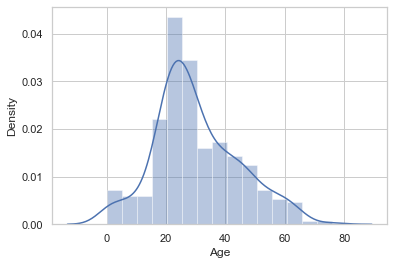

In [181]:
# using seaborn
sns.set(style="white") # white background
sns.set(style="whitegrid",color_codes=True)
sns.distplot(test_df['Age'],bins=15)

In [182]:
test_data=train_df.copy()

In [183]:
test_data["Age"].fillna(test_df["Age"].median(skipna=True),inplace=True)
test_data["Embarked"].fillna(test_df["Embarked"].value_counts().idxmax(),inplace=True)
test_data.drop('Cabin',axis=1,inplace=True)

In [184]:
test_data["TravelAlone"]=np.where((test_data["SibSp"]+test_data["Parch"])>0,0,1)
test_data.drop('SibSp',axis=1,inplace=True)
test_data.drop('Parch',axis=1,inplace=True)

In [185]:
testing=pd.get_dummies(test_data,columns=['Pclass','Embarked','Sex'])
testing.drop('Sex_female',axis=1,inplace=True)
testing.drop('PassengerId',axis=1,inplace=True)
testing.drop('Name',axis=1,inplace=True)
testing.drop('Ticket',axis=1,inplace=True)
final_test=training
final_test.head()

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,0,22.0,7.2500,0,0,0,1,0,0,1,1
1,1,38.0,71.2833,0,1,0,0,1,0,0,0
2,1,26.0,7.9250,1,0,0,1,0,0,1,0
3,1,35.0,53.1000,0,1,0,0,0,0,1,0
4,0,35.0,8.0500,1,0,0,1,0,0,1,1


In [186]:
final_test.isnull().sum()

Survived       0
Age            0
Fare           0
TravelAlone    0
Pclass_1       0
Pclass_2       0
Pclass_3       0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
Sex_male       0
dtype: int64

In [187]:
test_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
Ticket         0
Fare           0
Embarked       0
TravelAlone    0
dtype: int64

In [188]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
Ticket         0
Fare           0
Embarked       0
TravelAlone    0
dtype: int64

<AxesSubplot:xlabel='PassengerId', ylabel='Density'>

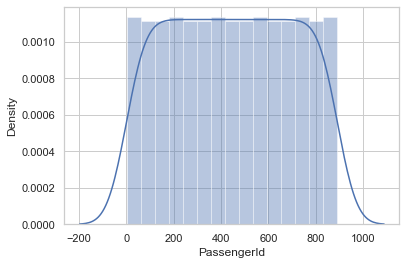

In [189]:
sns.distplot(train_data['PassengerId'],bins=15)

<AxesSubplot:xlabel='Survived', ylabel='Density'>

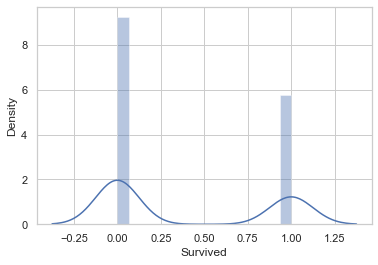

In [190]:
sns.distplot(train_data['Survived'],bins=15)

<AxesSubplot:xlabel='Pclass', ylabel='Density'>

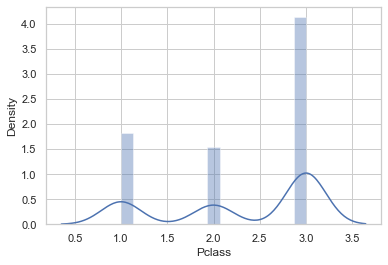

In [191]:
sns.distplot(train_data['Pclass'],bins=15)

<AxesSubplot:xlabel='Age', ylabel='Density'>

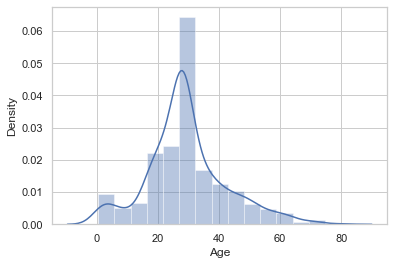

In [192]:
sns.distplot(train_data['Age'],bins=15)

<AxesSubplot:xlabel='Fare', ylabel='Density'>

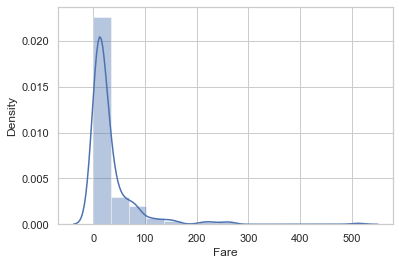

In [193]:
sns.distplot(train_data['Fare'],bins=15)

<AxesSubplot:xlabel='TravelAlone', ylabel='Density'>

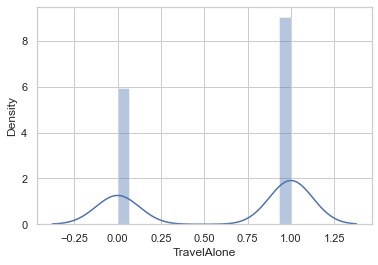

In [194]:
sns.distplot(train_data['TravelAlone'],bins=15)

Only age and fare has normal distribution

In [195]:
final_train['IsMinor']=np.where(final_train['Age']<=16,1,0)
final_test['IsMinor']=np.where(final_train['Age']<=16,1,0)

In [196]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

cols=["Age","Fare","TravelAlone","Pclass_1","Pclass_2","Pclass_3","Embarked_C","Embarked_S","Embarked_Q","Sex_male","IsMinor"]
X=final_train[cols]
y=final_train['Survived']
#Build a logreg and compute the feature importance
model=LogisticRegression()
# Create the RFE model and select 8 attributes
rfe=RFE(model,8)
rfe=rfe.fit(X,y)
print("Selection features :",list(x.columns[rfe.support_]))

Selection features : ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_S', 'Embarked_Q', 'Sex_male', 'IsMinor']


In [197]:
from sklearn.feature_selection import RFECV
rfecv=RFECV(estimator=LogisticRegression(),step=1,cv=10,scoring='accuracy')
rfecv.fit(X,y)
print("Optimal number of features :",rfecv.n_features_)
print("Selected Features :",list(x.columns[rfecv.support_]))

Optimal number of features : 10
Selected Features : ['Age', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_S', 'Embarked_Q', 'Sex_male', 'IsMinor']


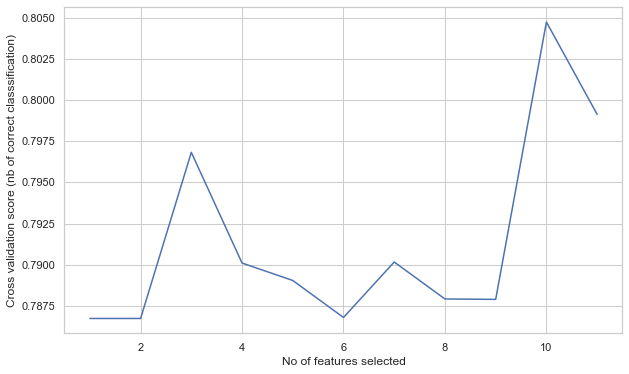

In [199]:
plt.figure(figsize=(10,6))
plt.xlabel("No of features selected")
plt.ylabel("Cross validation score (nb of correct classsification)")
plt.plot(range(1,len(rfecv.grid_scores_)+1),rfecv.grid_scores_)
plt.show()

In [208]:
Selected_features=['Age','TravelAlone','Pclass_1','Pclass_2','Pclass_3','Embarked_C','Embarked_S','Embarked_Q','Sex_male','IsMinor']
X=final_train[Selected_features]

In [209]:
from sklearn.model_selection import train_test_split, cross_val_score
y=final_train['Survived']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

In [219]:
# confusion Metrics
from sklearn.metrics import accuracy_score, classification_report, precision_score,recall_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc,log_loss
y_pred_proba=logreg.predict_proba(X_test)[:,1]
[fpr,tpr,thr]=roc_curve(y_test,y_pred_proba)
accuracy_score(y_test,y_pred)

0.7821229050279329

In [220]:
log_loss(y_test,y_pred_proba)

0.5054801548126596

In [221]:
auc(fpr,tpr)

0.8390506329113925

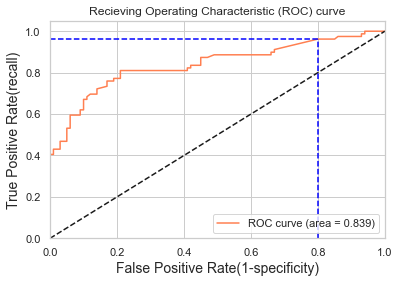

In [228]:
idx=np.min(np.where(tpr>0.95))
plt.figure()
plt.plot(fpr,tpr,color='coral',label='ROC curve (area = %0.3f)' % auc(fpr,tpr))
plt.plot([0,1],[0,1],'k--')
plt.plot([0,fpr[idx]],[tpr[idx],tpr[idx]],'k--',color='blue')
plt.plot([fpr[idx],fpr[idx]],[0,tpr[idx]],'k--',color='blue')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate(1-specificity)',fontsize=14)
plt.ylabel('True Positive Rate(recall)',fontsize=14)
plt.title("Recieving Operating Characteristic (ROC) curve")
plt.legend(loc='lower right')
plt.show()

In [230]:
from sklearn.model_selection import cross_validate
scoring={'accuracy':'accuracy','log_loss':'neg_log_loss','auc':'roc_auc'}
modelCV=LogisticRegression()
results=cross_validate(modelCV,X,y,cv=10,scoring=list(scoring.values()),return_train_score=False)
for sc in range(len(scoring)):
    print(modelCV.__class__.__name__+"average %s: %.3f(+/-%.3f)"%(list(scoring.keys())[sc],-results['test_%s' % list(scoring.values())[sc]].mean()
                                                                 if list(scoring.values())[sc]=='neg_log_loss'
                                                                 else results['test_%s' % list(scoring.values())[sc]].mean(),
                                                                 results['test_%s' %list(scoring.values())[sc]].std()))

LogisticRegressionaverage accuracy: 0.805(+/-0.025)
LogisticRegressionaverage log_loss: 0.454(+/-0.038)
LogisticRegressionaverage auc: 0.850(+/-0.028)
